In [1]:
from gravity_tree import *
from evolve_system import *

0.22080425658174405
1.6689539390592845
4.929638806494546
0.42210160896494286


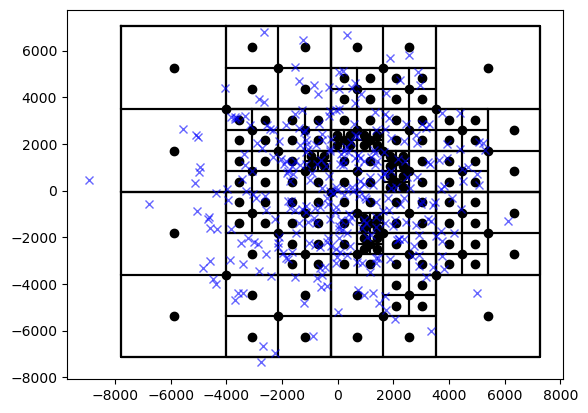

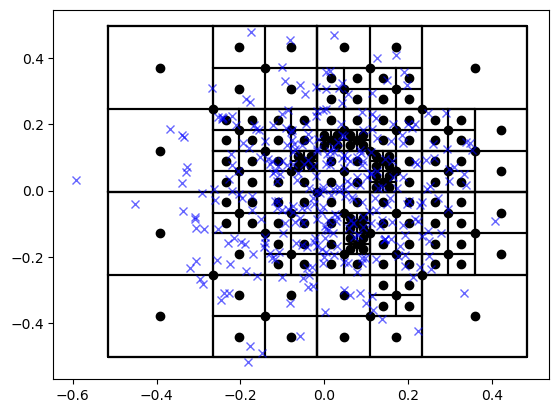

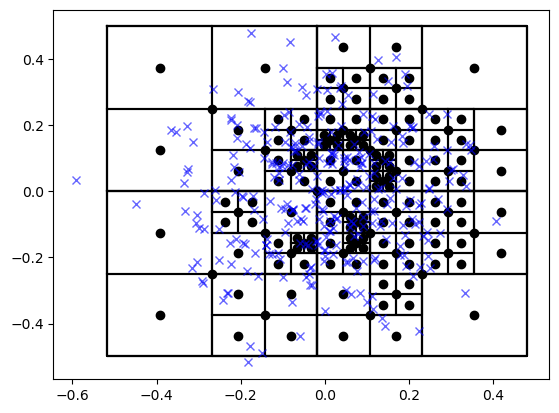

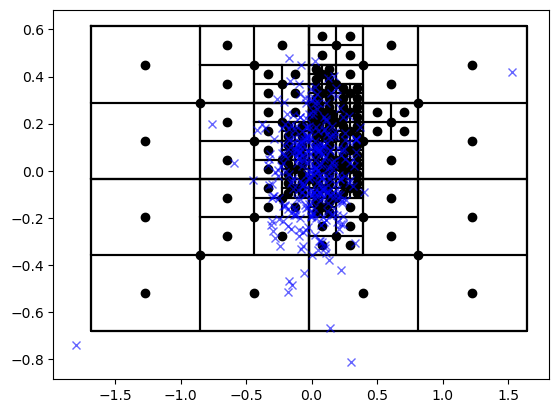

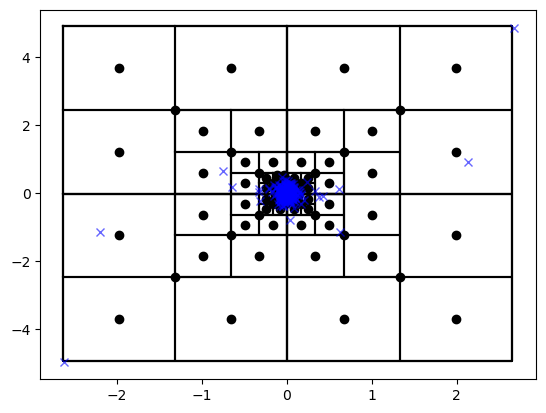

In [5]:
RANGE = 1000

pt_pos, pt_mass, n_part_per_cell, n_dim, n_grid, iter_max, n_pt, norm_vector = init_particle_field(std=RANGE/0.4)
test_tree, potential_tree = init_trees(n_dim, n_grid, n_part_per_cell, pt_mass, pt_pos, iter_max, critical_angle=0.1)
plot_tree(test_tree, pt_pos, norm_vector, RANGE=RANGE)
pt_vel  = 10000*np.ones((n_dim,n_pt))
pt_acc  = -1000*np.ones((n_dim,n_pt))
pt_jerk  = np.zeros((n_dim,n_pt))

a = 0
while a<4:
    dt, pt_mass, pt_pos, pt_vel, pt_acc, pt_jerk = evolve_dt(dt=1, pt_mass=pt_mass, pt_pos=pt_pos,\
                                                                            pt_vel=pt_vel, pt_acc=pt_acc, \
                                                                            pt_jerk=pt_jerk, G_gravity=1e-6)
    # acceleration_tree = compute_acceleration_tree(test_tree, critical_angle=0.1, G_gravity=1e-5, n_iter_max=1000, verbose=False)

    # acceleration_tree, test_pos = normal_to_physical(n_dim, acceleration_tree, test_pos, norm_vector)
    print(pt_acc.max())
    
    # test_pos += acceleration_tree
    pt_pos, norm_vector = normalize_field(n_dim, pt_pos)
    
    test_tree, potential_tree = init_trees(n_dim, n_grid, n_part_per_cell, pt_mass, pt_pos, iter_max, critical_angle=0.0)
    plot_tree(test_tree, pt_pos, norm_vector, RANGE=RANGE)
    a += 1